# Project: Investigate a Dataset (TMDb Movie Data)



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
the dataset is about 10k movies ratings and budget&revenue, Furthermore, extra informations.
collecting from (TMDB) 

### Questions:
> <ul> <li>Q1 : what the year that has the largest released movies?</li> <li>Q2 : Which genre is the most popular all over the all data ?</li> <li>Q3 : Which actor & production company has the most movies in all over the all data ?</li> </ul>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> <ul> <li>data gathering</li> <li>data assessment</li> <li>data cleaning</li> </ul>


## the data gathering

In [2]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## data assessment

In [3]:
movies_df.shape

(10866, 21)

the data contains 10866 rows , 21 columns

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

I noticed that 1-release_year is string
               2-there are null values
               3- tehre arre unnecessary columns

In [5]:
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
sum(movies_df.duplicated())
# movies_df['genres'].fillna('')
# movies_df.dropna(subset='genres',inplace=True)
# movies_df[movies_df['genres'].isna()==True]



1

there are one duplicated row 

# data cleaning


## 1- convert the data type of 'release_date' to pandas datetime

In [8]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [9]:
movies_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## 2- delete the duplicated rows from the datasets 

In [10]:
sum(movies_df.duplicated())

1

In [11]:
movies_df.drop_duplicates(inplace=True)

In [12]:
sum(movies_df.duplicated())

0

## 3- delete the unnecessary columns from dataset 

In [13]:
movies_df.drop(['homepage','budget_adj','revenue_adj','tagline','overview','imdb_id','keywords'],axis='columns',inplace=True)

In [14]:
movies_df.shape

(10865, 14)

the shape of the data has changed after deleted the ubnecessary columns and the duplicated

## 4- add 'profit' column to the dataset

In [15]:
movies_df['profit'] = movies_df.revenue - movies_df.budget
movies_df['profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



## Q1 : what the year that has the largest released movies?


In [56]:
movies_df.groupby('release_year').count().tail(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,profit
release_year,,,,,,,,,,,,,,
2013,659,659,659,659,659,656,655,659,656,571,659,659,659,659
2014,700,700,700,700,700,688,695,700,699,641,700,700,700,700
2015,629,629,629,629,629,621,626,629,627,565,629,629,629,629


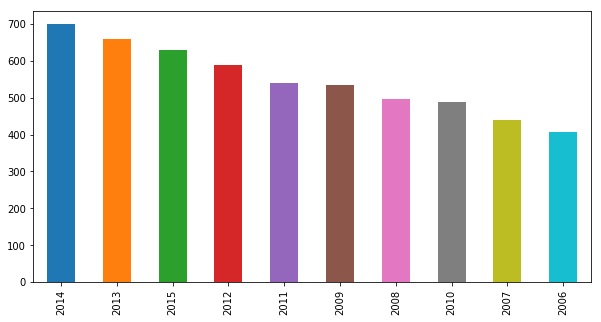

In [45]:
most_year = movies_df['release_year'].value_counts()
most_year.head(10).plot(kind='bar',figsize=(10,5));

In [36]:
movies_df['release_year'].value_counts().idxmax()


2014

2014 is the year that has largest released movies

## Q2 : Which genre is the most popular all over the all data ?

In [49]:
# method to count the occurrence of the different types separated by pip '|'
def split_pip (x,data) :
    #initial empty string 
    string=''
    #fo loop all over the dataset
    for i in range(data.shape[0]) :
        string = string + str(data[x].iloc[i]) #concatenate all in one string
        string=string+"|"
    return pd.Series(string.split('|')).value_counts(ascending=False) #return the value_counts of pandas Series contains all after split it

In [24]:
genres_plot = split_pip('genres',movies_df)
print(genres_plot)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
nan                  23
                      1
dtype: int64


In [27]:
genres_plot.idxmax()

'Drama'

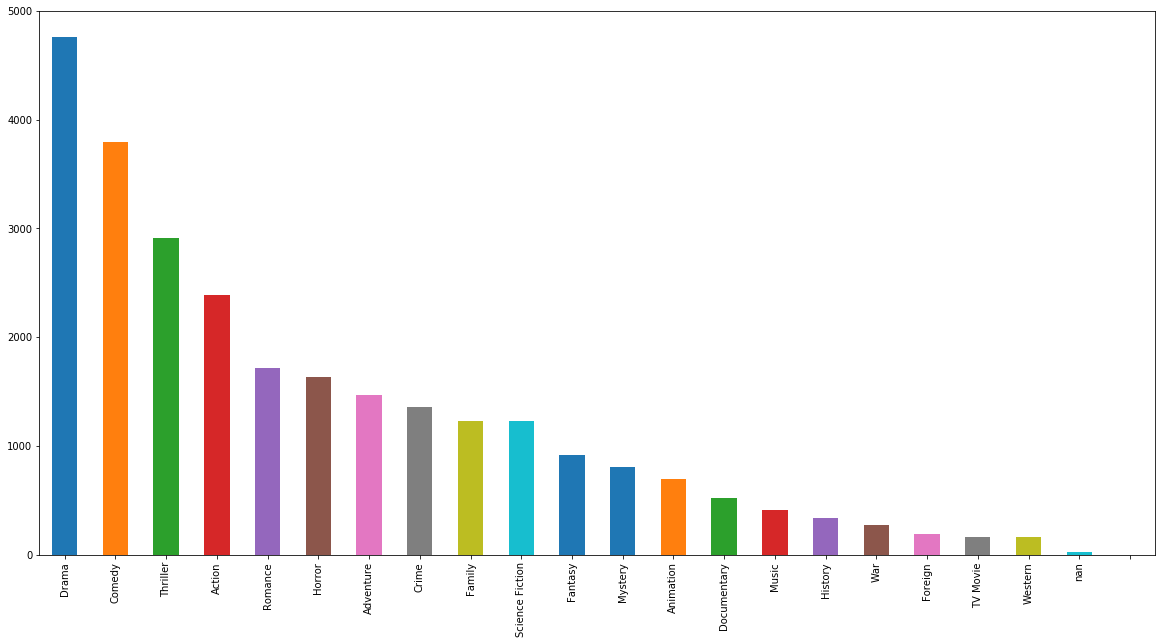

In [25]:
genres_plot.plot(kind= 'bar',figsize = (20,10))

from the graph above , the "Drama" genre is the most popular genre all over the all dataset

## Q3 : Which actor & production company has the most movies in all over the all data ?


In [54]:
genres_plot = split_pip('cast',movies_df.dropna(subset=['cast'])).iloc[:10]
company_plot = split_pip('production_companies',movies_df.dropna(subset=['production_companies'])).iloc[:10]
print(genres_plot)
print('---------------------------')
print(company_plot)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
dtype: int64
---------------------------
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64


"Robert De Niro"/"Universal Pictures" have the most movies in all over all data

<a id='conclusions'></a>
## Conclusions


### Questions & Answers:
> <ul> <li>Q1 : what the year that has the largest released movies?------------> 2014</li> <li>Q2 : Which genre is the most popular all over the all data ?------------> Drama</li> <li>Q3 : Which actor & production company has the most movies in all over the all data ?------------> "Robert De Niro"/"Universal Pictures" </li> </ul>


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])